### The dataset (data5.mat) contains 72 features and the last column is the output (class labels). Design a multilayer perceptron based neural network (two hidden layers) for the classification. You can use both holdout (70, 10, and 20%) and 5-fold cross-validation approaches for evaluating the performance of the classifier (individual accuracy and overall accuracy). You can select the number of hidden neurons of each hidden layer and other MLP parameters using grid-search method. (Packages such as keras, tensorflow, pytorch for python and MATLAB deep learning toolbox etc. are not allowed). 

In [ ]:
#import all the necessory libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits import mplot3d
import scipy.io
import math

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
root="/content/drive/MyDrive/NNFL_Assignment2/data5.mat"
data=scipy.io.loadmat(os.path.join(root))
data=data['x']
np.random.shuffle(data)
print((data.shape))


(2148, 73)


In [ ]:
def onehoten(data):
    y=data[:,-1]
    count=0
    cls=[]
    for insts in range(0,y.shape[0]):
        if y[insts] in cls:
            continue
        else:
            cls.append(y[insts])
    nclasses=len(cls)
    z=np.zeros([y.shape[0],nclasses],dtype=int)
    for insts in range(0,y.shape[0]):
        z[insts,int(y[insts])]=z[insts,int(y[insts])]+1
    return z
        

In [ ]:
def split_classes(data):
    x=np.delete(data,-1,1)
    y=onehoten(data)
    c=[]
    for cls in range(0,y.shape[1]):
        temp=[]
        for insts in range(data.shape[0]):
            if y[insts,cls]==1:
                temp.append(data[insts])
        c.append(np.array(temp))
    return(c)

In [ ]:
def split_folds(data,k):
    folds=np.array_split(data,k)
    return folds

In [ ]:
def split_train_test(classes,trainperc):
    for c in range(len(classes)):
        dat=classes[c]
        train=dat[:round(dat.shape[0]*trainperc/100),:]
        test=dat[round(dat.shape[0]*trainperc/100):,:]
        if c!=0:
            train=np.concatenate((trainold,train),axis=0)
            test=np.concatenate((testold,test),axis=0)
        trainold=train
        testold=test
    np.random.shuffle(train)
    np.random.shuffle(test)
        
    return train , test


In [ ]:
def split_x_y(data):
    x=np.delete(data,-1,1)
    x=normalize(x).T
#   x=np.concatenate((x,np.ones((data.shape[0],1))),axis=1)
    y=onehoten(data).T
    return x,y

In [ ]:
def normalize(data):
    for i in range(data.shape[1]):
        temp=data[:,i]
        data[:,i]=(temp-np.mean(temp))/np.std(temp)
    return data

In [ ]:
#input list of ints(no.of perceptrons per layer).in this question, ist [72,50,50,2].
def init_par(l):
    w=[]
    b=[]
    for i in range(len(l)-1):
        we=np.random.rand(l[i],l[i+1])
        be=np.zeros((l[i+1],1))
        w.append(we)
        b.append(be)
    return (w),(b)
        
        

In [ ]:
def sigmoid(z):
    s=1/(1+np.exp(-z))
    return s

In [ ]:
def forward_prop(w,b,x_train):
    nlayers=len(w)+1
    lv=[]
    a=x_train
    lv.append(a)
    #l is the layer-1
    for l in range(0,nlayers-1):
        ai=a
        a=sigmoid(np.dot(w[l].T,ai)+b[l])
        lv.append(a)
    pred=lv[-1]
    return pred,lv

In [ ]:
def back_prop(w,b,lv,x_train,y_train,alpha):
    nlayers=len(w)+1
    ei=((-y_train+lv[-1])*lv[-1]*(1-lv[-1]))
#     y_train-lv[-1].T.shape=[1504,2]
    for l in reversed(range(1,len(lv))):
        if l == (nlayers-1):
            dz=ei
        else:
            dz=(ei*lv[l]*(1-lv[l]))
#         ef.shape[1504,2]
        dw=np.dot(dz,lv[l-1].T).T
        db=np.sum(dz,axis=1,keepdims=True)
#             lv[l-1].shape=[1504,50]
#         e.shape=[2,50]
        w[l-1]=w[l-1]-alpha*dw
        b[l-1]=b[l-1]-alpha*db
        if l!=0:
#         ef.shape=[1504,2]   w.T.shape=[2,50]
#         e.shape=[1504,50]
            ei=np.dot(w[l-1],dz)
#         e.shape=[1504,50]
    return w,b
        
        
        

In [ ]:
def MLP(data,epochs,alpha,percepset=[72,30,10,2]):
    es=[]
    ev=[]
    w,b=init_par(percepset)
    train,test=split_train_test(split_classes(data),80)
    train,valid=split_train_test(split_classes(train),87.5)
    x_train,y_train=split_x_y(train)
    x_valid,y_valid=split_x_y(valid)
    x_test,y_test=split_x_y(test)
    for eps in range(0,epochs):
        #         print(eps)
        pred,lv=forward_prop(w,b,x_train)
        predval,_=forward_prop(w,b,x_valid)
        e=sum(sum((y_train-pred)**2))/y_train.shape[1]
        evalid=sum(sum((y_valid-predval)**2))/y_valid.shape[1]
        w,b=back_prop(w,b,lv,x_train,y_train,alpha)
        es.append(e)
        ev.append(evalid)
    predtest,_=forward_prop(w,b,x_test)
    testerror=sum(sum((y_test-predtest)**2))/y_test.shape[1]
    print("test error = {}".format(testerror))
    
    return es,ev,testerror

In [ ]:
traine,valide,teste=MLP(data,2000,0.001)
print("Training error converged from {} to {}".format(traine[0],traine[-1]))

test error = 0.20105308527336394
Training error converged from 0.9243511923086271 to 0.08460947377974891


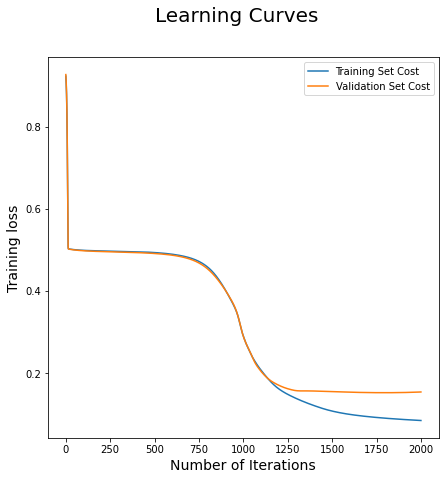

In [ ]:

fig=plt.figure()
fig.set_figheight(7)
fig.set_figwidth(7)
fig.suptitle('Learning Curves', fontsize=20)
plt.xlabel('Number of Iterations', fontsize=14)
plt.ylabel('Training loss',fontsize=14)
plt.plot(range(0,len(traine)),traine, label = 'Training Set Cost')
plt.plot(range(0,len(valide)),valide, label = 'Validation Set Cost')
plt.legend()
plt.show()

In [ ]:
def MLPKFOLD(data,epochs,alpha,k,percepset=[72,30,10,2]):
    folds=split_folds(data,k)
    w,b=init_par(percepset)
    testerrors=[]
    accs=[]
    sens=[]
    specs=[]
    confmats=[]
    es=[]
    ev=[]
    for fold in range(0,k):
        train=[]
        for fld in range(0,k):
            if (fold==fld):
                test=folds[fold]
            else:
                train.append(folds[fold])
        train=np.array(train).reshape((int(data.shape[0]*(1-k)/k),data.shape[1]))
        try:
            test=np.array(test).reshape((430,data.shape[1]))
        except:
            test=np.array(test).reshape((429,data.shape[1]))
        train,valid=split_train_test(split_classes(train),90)
        x_train,y_train=split_x_y(train)
        x_valid,y_valid=split_x_y(valid)
        x_test,y_test=split_x_y(test)
        for eps in range(0,epochs):
            pred,lv=forward_prop(w,b,x_train)
            predval,_=forward_prop(w,b,x_valid)
            e=sum(sum((y_train-pred)**2))/y_train.shape[1]
            evalid=sum(sum((y_valid-predval)**2))/y_valid.shape[1]
            w,b=back_prop(w,b,lv,x_train,y_train,alpha)
            es.append(e)
            ev.append(evalid)
        predtest,_=forward_prop(w,b,x_test)
        testerror=sum(sum((y_test-predtest)**2))/y_test.shape[1]
        testerrors.append(testerror)
        h_test=np.rint(predtest[0,:]).reshape((test.shape[0],1))
        y_test=y_test[0,:].reshape((test.shape[0],1))
        error = (y_test-np.rint(h_test)).tolist()
        som = (y_test+np.rint(h_test)).tolist()
        FN = error.count([1.0])
        FP = error.count([-1.0])
        TN = som.count([0.0])
        TP = som.count([2.0])
        accuracy = (TP+TN)/(TP+TN+FP+FN)
        sensitivity = TP/(TP+FN)
        specificity = TN/(FP+TN)
        conf_matrix = np.array(([TP,FP],[FN,TN]))
        accs.append(accuracy)
        sens.append(sensitivity)
        specs.append(specificity)
        confmats.append(conf_matrix)

    return testerrors,accs,sens,specs,confmats,es,ev

In [ ]:
testerror,accs,sens,specs,confmats,trainer,valider=MLPKFOLD(data,2000,0.01,5,percepset=[72,30,10,2])

In [ ]:
print("Accuracies={}".format(accs))
print("Sensitivity={}".format(sens))
print("Specificity={}".format(specs))
for i in range(len(confmats)):
    print(confmats[i])
print("Training error converged from {} to {}".format(trainer[0],trainer[-1]))
print("Validation error converged from {} to {}".format(valider[0],valider[-1]))
print("Test error converged from {} to {}".format(testerror[0],testerror[-1]))

Accuracies=[0.9930232558139535, 0.9906976744186047, 0.9906976744186047, 0.9953379953379954, 0.9953379953379954]
Sensitivity=[0.9952380952380953, 0.9863636363636363, 0.9951219512195122, 1.0, 0.9908256880733946]
Specificity=[0.990909090909091, 0.9952380952380953, 0.9866666666666667, 0.9903381642512077, 1.0]
[[209   2]
 [  1 218]]
[[217   1]
 [  3 209]]
[[204   3]
 [  1 222]]
[[222   2]
 [  0 205]]
[[216   0]
 [  2 211]]
Training error converged from 0.9442251156250331 to 0.010370703841280434
Validation error converged from 0.9464596489775168 to 0.07593971207258458
Test error converged from 0.014125692622248578 to 0.009341228885850133
